# 1. 필요한 모듈 불러오기

In [1]:
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import *
from sklearn.metrics import *
import matplotlib.pyplot as plt
from pycaret.clustering import *
from scipy.spatial.distance import cdist


# 2. 파일 불러오기

In [2]:
train = pd.read_csv('train.csv')
validate = pd.read_csv('validate.csv')

validate

,webtoon_name,rating,link,day,genre,interest,rank_day,episode_count,originality,authors,...,즐거움/신남,증오/혐오,지긋지긋,짜증,한심함,행복,화남/분노,환영/호의,흐뭇함(귀여움/예쁨),힘듦/지침
0,참교육,9.89,https://comic.naver.com/webtoon/list?titleId=7...,mon,액션,952557,1,179,0,"['한가람', '채용택']",...,0.026667,0.013333,0.013333,0.173333,0.026667,0.0,0.053333,0.000000,0.000000,0.0
1,환생천마,9.95,https://comic.naver.com/webtoon/list?titleId=8...,mon,무협/사극,153632,2,52,1,"['부겸', '장영훈', 'JP']",...,0.341463,0.024390,0.000000,0.024390,0.000000,0.0,0.024390,0.024390,0.000000,0.0
2,똑 닮은 딸,9.98,https://comic.naver.com/webtoon/list?titleId=7...,mon,스릴러,673334,3,142,0,['이담'],...,0.053333,0.000000,0.000000,0.013333,0.026667,0.0,0.040000,0.000000,0.000000,0.0
3,신의 탑,9.84,https://comic.naver.com/webtoon/list?titleId=1...,mon,판타지,1909208,4,653,0,['SIU'],...,0.133333,0.000000,0.000000,0.080000,0.013333,0.0,0.013333,0.000000,0.040000,0.0
4,어느날 갑자기 가슴이 커짐,9.81,https://comic.naver.com/webtoon/list?titleId=8...,mon,일상,70824,5,25,0,['물렁이'],...,0.066667,0.000000,0.000000,0.026667,0.026667,0.0,0.026667,0.013333,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,밤필드의 아이들 by DARK MOON,9.84,https://comic.naver.com/webtoon/list?titleId=8...,sun,판타지,49934,91,48,0,['HYBE'],...,0.112676,0.000000,0.000000,0.014085,0.000000,0.0,0.000000,0.000000,0.084507,0.0
663,노래 못 하는 남자,9.92,https://comic.naver.com/webtoon/list?titleId=8...,sun,로맨스,22545,92,57,0,"['재은', '이해금']",...,0.000000,0.000000,0.000000,0.032258,0.000000,0.0,0.032258,0.000000,0.064516,0.0
664,마섹남 - 마술하는 섹시한 남자,9.89,https://comic.naver.com/webtoon/list?titleId=7...,sun,로맨스,54426,93,90,1,"['랑또', '육시몬', '티르스']",...,0.188406,0.000000,0.000000,0.014493,0.000000,0.0,0.014493,0.014493,0.028986,0.0
665,주인공의 주식을 팝니다,9.84,https://comic.naver.com/webtoon/list?titleId=8...,sun,로맨스,57199,94,96,1,"['목감기', '가얌', '50']",...,0.160714,0.000000,0.000000,0.000000,0.000000,0.0,0.017857,0.000000,0.071429,0.0


# 3. 전처리

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank_popularity      671 non-null    int64  
 1   webtoon_name         671 non-null    object 
 2   rating               671 non-null    float64
 3   link                 671 non-null    object 
 4   genre                671 non-null    object 
 5   interest             671 non-null    int64  
 6   episode_count        671 non-null    int64  
 7   originality          671 non-null    int64  
 8   authors              671 non-null    object 
 9   work_count           671 non-null    float64
 10  previous_work        671 non-null    int64  
 11  likes                671 non-null    int64  
 12  rating_participants  671 non-null    int64  
 13  comments_count       671 non-null    int64  
 14  감동/감탄                671 non-null    float64
 15  경악                   671 non-null    flo

In [4]:
validate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   webtoon_name         667 non-null    object 
 1   rating               667 non-null    float64
 2   link                 667 non-null    object 
 3   day                  667 non-null    object 
 4   genre                667 non-null    object 
 5   interest             667 non-null    int64  
 6   rank_day             667 non-null    int64  
 7   episode_count        667 non-null    object 
 8   originality          667 non-null    int64  
 9   authors              667 non-null    object 
 10  work_count           667 non-null    float64
 11  previous_work        667 non-null    float64
 12  likes                667 non-null    int64  
 13  rating_participants  667 non-null    int64  
 14  comments_count       667 non-null    int64  
 15  감동/감탄                667 non-null    flo

In [5]:
train.describe()

,rank_popularity,rating,interest,episode_count,originality,work_count,previous_work,likes,rating_participants,comments_count,...,즐거움/신남,증오/혐오,지긋지긋,짜증,한심함,행복,화남/분노,환영/호의,흐뭇함(귀여움/예쁨),힘듦/지침
count,671.000000,671.000000,6.710000e+02,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000
mean,792.409836,9.849732,2.561735e+05,133.233979,0.156483,4.960010,0.429210,93533.432191,135866.797317,17817.263785,...,0.126821,0.005948,0.000079,0.035252,0.015506,0.001828,0.018081,0.004500,0.028350,0.001548
std,481.969300,0.383748,2.255609e+05,132.375778,0.363584,11.245317,0.495333,69811.162391,103196.934835,22823.077977,...,0.077963,0.011691,0.001027,0.034742,0.018821,0.006439,0.025952,0.009074,0.041113,0.004771
min,1.000000,3.810000,1.000020e+05,5.000000,0.000000,1.000000,0.000000,4095.000000,7437.000000,416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,402.500000,9.880000,1.276140e+05,68.000000,0.000000,1.500000,0.000000,45043.000000,59682.000000,4070.500000,...,0.066667,0.000000,0.000000,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,793.000000,9.950000,1.733120e+05,101.000000,0.000000,2.500000,0.000000,76203.000000,112426.000000,10007.000000,...,0.108108,0.000000,0.000000,0.026667,0.013333,0.000000,0.013333,0.000000,0.013333,0.000000
75%,1123.500000,9.970000,3.121910e+05,149.000000,0.000000,4.000000,1.000000,123086.000000,182956.000000,23520.500000,...,0.166667,0.013333,0.000000,0.050000,0.026667,0.000000,0.026667,0.000000,0.040000,0.000000
max,2083.000000,9.980000,2.622242e+06,1414.000000,1.000000,95.000000,1.000000,494070.000000,973436.000000,225528.000000,...,0.490909,0.082192,0.013333,0.240000,0.148649,0.066667,0.200000,0.066667,0.283333,0.033333


In [6]:
validate.describe()

,rating,interest,rank_day,originality,work_count,previous_work,likes,rating_participants,comments_count,감동/감탄,...,즐거움/신남,증오/혐오,지긋지긋,짜증,한심함,행복,화남/분노,환영/호의,흐뭇함(귀여움/예쁨),힘듦/지침
count,667.000000,6.670000e+02,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,...,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,9.817061,1.341608e+05,51.100450,0.317841,2.396927,0.580210,39909.620690,39797.515742,3829.109445,0.151658,...,0.140556,0.003701,0.000020,0.024377,0.013366,0.001629,0.014157,0.003789,0.033326,0.001649
std,0.430652,1.997636e+05,28.655305,0.465987,2.642625,0.493895,52322.306604,58381.334072,10162.604346,0.101992,...,0.091543,0.008891,0.000516,0.030171,0.020015,0.005762,0.025776,0.009667,0.045744,0.005905
min,3.910000,1.613000e+03,1.000000,0.000000,1.000000,0.000000,250.000000,290.000000,87.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.840000,3.355700e+04,26.500000,0.000000,1.000000,0.000000,9631.500000,9457.500000,724.500000,0.081081,...,0.069767,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.920000,7.130400e+04,51.000000,0.000000,1.500000,1.000000,20405.000000,19181.000000,1355.000000,0.125000,...,0.120000,0.000000,0.000000,0.014706,0.000000,0.000000,0.000000,0.000000,0.017857,0.000000
75%,9.960000,1.538725e+05,75.500000,1.000000,2.416667,1.000000,48211.000000,45776.000000,2916.500000,0.192044,...,0.200000,0.000000,0.000000,0.039216,0.020833,0.000000,0.019608,0.000000,0.046693,0.000000
max,9.980000,2.422324e+06,105.000000,1.000000,22.000000,1.000000,360854.000000,598148.000000,131963.000000,0.613333,...,0.588235,0.048780,0.013333,0.173333,0.150685,0.042254,0.360000,0.083333,0.294118,0.053333


# 4. EDA

In [7]:
train.head()

,rank_popularity,webtoon_name,rating,link,genre,interest,episode_count,originality,authors,work_count,...,즐거움/신남,증오/혐오,지긋지긋,짜증,한심함,행복,화남/분노,환영/호의,흐뭇함(귀여움/예쁨),힘듦/지침
0,20,연애혁명,9.87,https://comic.naver.com/webtoon/list?titleId=5...,드라마,2622242,442,0,['232'],2.0,...,0.160000,0.000000,0.0,0.040000,0.013333,0.013333,0.0,0.013333,0.000000,0.0
1,100,마음의소리,9.86,https://comic.naver.com/webtoon/list?titleId=2...,개그,1750053,1238,0,['조석'],18.0,...,0.093333,0.013333,0.0,0.013333,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,67,프리드로우,9.79,https://comic.naver.com/webtoon/list?titleId=5...,드라마,1575709,516,0,['전선욱'],3.0,...,0.080000,0.000000,0.0,0.026667,0.000000,0.000000,0.0,0.026667,0.000000,0.0
3,89,노블레스,9.62,https://comic.naver.com/webtoon/list?titleId=2...,판타지,1371554,545,0,"['손제호', '이광수']",3.5,...,0.133333,0.000000,0.0,0.026667,0.000000,0.000000,0.0,0.000000,0.000000,0.0
4,48,갓 오브 하이스쿨,9.64,https://comic.naver.com/webtoon/list?titleId=3...,판타지,1371113,573,0,['박용제'],2.0,...,0.106667,0.000000,0.0,0.000000,0.013333,0.000000,0.0,0.000000,0.013333,0.0


In [8]:
train.columns

Index(['rank_popularity', 'webtoon_name', 'rating', 'link', 'genre',
       'interest', 'episode_count', 'originality', 'authors', 'work_count',
       'previous_work', 'likes', 'rating_participants', 'comments_count',
       '감동/감탄', '경악', '고마움', '공포/무서움', '귀찮음', '기대감', '기쁨', '깨달음', '놀람',
       '당황/난처', '부담/안_내킴', '불쌍함/연민', '불안/걱정', '불평/불만', '비장함', '슬픔', '신기함/관심',
       '아껴주는', '안심/신뢰', '안타까움/실망', '어이없음', '없음', '우쭐댐/무시함', '의심/불신', '재미없음',
       '절망', '존경', '즐거움/신남', '증오/혐오', '지긋지긋', '짜증', '한심함', '행복', '화남/분노',
       '환영/호의', '흐뭇함(귀여움/예쁨)', '힘듦/지침'],
      dtype='object')

# 5. 모델 불러오기

## 5-1. AUTOML

In [83]:
# 환경설정
exp1 = setup(train, normalize = True, ignore_features = ['webtoon_name', 'link', 'genre', 'authors', 'originality', 'previous_work', 'work_count', '감동/감탄', '경악', '고마움', '공포/무서움', '귀찮음', '기대감', '기쁨', '깨달음', '놀람', '당황/난처', '부담/안_내킴', '불쌍함/연민', '불안/걱정', '불평/불만', '비장함', '슬픔', '신기함/관심', '아껴주는', '안심/신뢰', '안타까움/실망', '어이없음', '없음', '우쭐댐/무시함', '의심/불신', '재미없음', '절망', '존경', '즐거움/신남', '증오/혐오', '지긋지긋', '짜증', '한심함', '행복', '화남/분노', '환영/호의', '흐뭇함(귀여움/예쁨)', '힘듦/지침']) 
exp1

,Description,Value
0,Session id,2027
1,Original data shape,"(671, 51)"
2,Transformed data shape,"(671, 7)"
3,Ignore features,44
4,Numeric features,7
5,Preprocess,True
6,Imputation type,simple
7,Numeric imputation,mean
8,Categorical imputation,mode
9,Normalize,True


In [84]:
# Clustering 모델 비교
models = ['kmeans', 'ap', 'meanshift', 'sc', 'hclust', 'dbscan', 'optics', 'birch', 'kmodes']

results = {}

# 모델 별 평가
for model_name in models:
    print(f"Training model: {model_name}")
    try:
        model = create_model(model_name)
        metrics = pull()  
        results[model_name] = metrics.iloc[-1].to_dict()  
    except Exception as e:
        print(f"Error training model {model_name}: {e}")

# 결과 데이터프레임 생성
results_df = pd.DataFrame(results).T

Training model: kmeans


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3212,187.0214,1.3358,0,0,0


Training model: ap


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1871,124.1629,0.9550,0,0,0


Training model: meanshift


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.3285,41.2147,0.8876,0,0,0


Training model: sc


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6871,61.2242,0.6115,0,0,0


Training model: hclust


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2274,168.4459,1.2354,0,0,0


Training model: dbscan


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.1145,30.3794,1.7538,0,0,0


Training model: optics


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.4728,3.4499,1.5934,0,0,0


Training model: birch


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4781,140.8176,0.9938,0,0,0


Training model: kmodes
Error training model kmodes: Estimator kmodes not available. Please see docstring for list of available estimators.


In [85]:
# 결과 출력 -> 지표상으로는 
print("Clustering Model Comparison:")
results_df

Clustering Model Comparison:


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
kmeans,0.3212,187.0214,1.3358,0.0,0.0,0.0
ap,0.1871,124.1629,0.9550,0.0,0.0,0.0
meanshift,0.3285,41.2147,0.8876,0.0,0.0,0.0
sc,0.6871,61.2242,0.6115,0.0,0.0,0.0
hclust,0.2274,168.4459,1.2354,0.0,0.0,0.0
dbscan,-0.1145,30.3794,1.7538,0.0,0.0,0.0
optics,-0.4728,3.4499,1.5934,0.0,0.0,0.0
birch,0.4781,140.8176,0.9938,0.0,0.0,0.0


In [102]:
data = train.drop(['webtoon_name', 'link', 'work_count', 'genre', 'rating', 'authors', '감동/감탄', '경악', '고마움', '공포/무서움', '귀찮음', '기대감', '기쁨', '깨달음', '놀람', '당황/난처', '부담/안_내킴', '불쌍함/연민', '불안/걱정', '불평/불만', '비장함', '슬픔', '신기함/관심', '아껴주는', '안심/신뢰', '안타까움/실망', '어이없음', '없음', '우쭐댐/무시함', '의심/불신', '재미없음', '절망', '존경', '즐거움/신남', '증오/혐오', '지긋지긋', '짜증', '한심함', '행복', '화남/분노', '환영/호의', '흐뭇함(귀여움/예쁨)', '힘듦/지침'], axis = 1)

# 장르 원핫인코딩
data = pd.get_dummies(data, columns=['originality'], prefix="origin_FT")
data = pd.get_dummies(data, columns=['previous_work'], prefix="prev_FT")

data

,rank_popularity,interest,episode_count,likes,rating_participants,comments_count,origin_FT_0,origin_FT_1,prev_FT_0,prev_FT_1
0,20,2622242,442,387815,713799,116333,True,False,True,False
1,100,1750053,1238,110500,268305,89049,True,False,True,False
2,67,1575709,516,193124,528133,122728,True,False,True,False
3,89,1371554,545,91983,263859,82093,True,False,True,False
4,48,1371113,573,134823,261048,56406,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...
666,699,100757,6,167064,90884,20049,True,False,False,True
667,392,100152,96,16269,106969,12181,True,False,False,True
668,1492,100123,101,38437,35966,1541,False,True,True,False
669,308,100073,8,40043,58427,4569,True,False,False,True


In [103]:
from sklearn.cluster import SpectralClustering
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data['rank_popularity_normalized'] = scaler.fit_transform(data[['rank_popularity']])
data['rank_popularity_transformed'] = 1 - data['rank_popularity_normalized'] 

data.drop(['rank_popularity', 'rank_popularity_normalized'], axis = 1, inplace=True)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 기본 Spectral Clustering 모델 설정
base_model = SpectralClustering(assign_labels="kmeans", random_state=17)

# 하이퍼파라미터 그리드 설정
param_grid = {
    "n_clusters": [5, 6, 7, 8],  # 클러스터 개수
    "affinity": ["rbf", "nearest_neighbors", 'cosine'],  # affinity 방식
    "gamma": [0.1, 0.3, 0.5, 0.7, 1, 1.5, 1.7, 2],  # rbf affinity의 gamma 파라미터
    "n_neighbors": [5, 7, 8, 10, 15, 16, 17, 20]  # nearest_neighbors affinity에서 이웃 수
}

# 사용자 정의 스코어링 함수: silhouette_score를 사용합니다.
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# GridSearchCV 설정
grid_search = GridSearchCV(
    estimator=base_model,
    param_grid=param_grid,
    scoring=silhouette_scorer,
    cv=10,  # 데이터 분할
    verbose=2,
    n_jobs=-1  # 병렬 실행
)

# 하이퍼파라미터 튜닝 수행
grid_search.fit(data_scaled)

# 최적의 하이퍼파라미터와 점수 확인
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(f"Best Parameters: {best_params}")
print(f"Best Silhouette Score: {best_score:.4f}")

# 최적의 모델로 클러스터링 진행
best_model = grid_search.best_estimator_
clusters = best_model.fit_predict(data_scaled)

# 클러스터링 결과를 원본 데이터에 추가
data['cluster'] = clusters
data

Fitting 10 folds for each of 768 candidates, totalling 7680 fits
Best Parameters: {'affinity': 'rbf', 'gamma': 2, 'n_clusters': 5, 'n_neighbors': 5}
Best Silhouette Score: 0.4559


,interest,episode_count,likes,rating_participants,comments_count,origin_FT_0,origin_FT_1,prev_FT_0,prev_FT_1,rank_popularity_transformed,cluster
0,2622242,442,387815,713799,116333,True,False,True,False,0.990874,0
1,1750053,1238,110500,268305,89049,True,False,True,False,0.952450,0
2,1575709,516,193124,528133,122728,True,False,True,False,0.968300,4
3,1371554,545,91983,263859,82093,True,False,True,False,0.957733,0
4,1371113,573,134823,261048,56406,True,False,False,True,0.977426,0
...,...,...,...,...,...,...,...,...,...,...,...
666,100757,6,167064,90884,20049,True,False,False,True,0.664745,0
667,100152,96,16269,106969,12181,True,False,False,True,0.812200,0
668,100123,101,38437,35966,1541,False,True,True,False,0.283862,0
669,100073,8,40043,58427,4569,True,False,False,True,0.852546,0


In [90]:
data['cluster'].value_counts()

cluster
0    670
1      1
Name: count, dtype: int64

## 5-2. Classification

In [9]:
data = pd.read_csv('웹툰 라벨링 데이터.csv')
data = data.drop('Unnamed: 0', axis = 1)

In [10]:
data

,웹툰 이름,웹툰 별점,장르,웹툰 관심수,회차,스케일링 순위,스케일링 관심수,정답 라벨링
0,노블레스,9.62,판타지,1371554.0,545,961.736887,9198.671890,7
1,갓 오브 하이스쿨,9.64,판타지,1371113.0,573,979.363715,9195.681202,7
2,유미의 세포들,9.93,로맨스,1285627.0,512,987.962167,8615.948845,7
3,여신강림,9.34,로맨스,1216760.0,261,883.920894,8148.919995,7
4,싸움독학,9.67,액션,1115468.0,223,815.563199,7461.997576,7
...,...,...,...,...,...,...,...,...
2246,밤필드의 아이들 by DARK MOON,9.84,판타지,49934.0,48,38.961039,235.965975,0
2247,노래 못 하는 남자,9.92,로맨스,22545.0,57,30.303030,50.224573,0
2248,마섹남 - 마술하는 섹시한 남자,9.89,로맨스,54426.0,90,23.088023,266.428949,0
2249,주인공의 주식을 팝니다,9.84,로맨스,57199.0,96,12.987013,285.234342,0


In [11]:
data['정답 라벨링'].value_counts()

정답 라벨링
0    722
2    394
1    361
3    270
4    213
5    140
6     85
7     66
Name: count, dtype: int64

In [12]:
result = pd.concat([train, validate], ignore_index=True)
result

,rank_popularity,webtoon_name,rating,link,genre,interest,episode_count,originality,authors,work_count,...,지긋지긋,짜증,한심함,행복,화남/분노,환영/호의,흐뭇함(귀여움/예쁨),힘듦/지침,day,rank_day
0,20.0,연애혁명,9.87,https://comic.naver.com/webtoon/list?titleId=5...,드라마,2622242,442,0,['232'],2.000000,...,0.0,0.040000,0.013333,0.013333,0.000000,0.013333,0.000000,0.0,NaN,NaN
1,100.0,마음의소리,9.86,https://comic.naver.com/webtoon/list?titleId=2...,개그,1750053,1238,0,['조석'],18.000000,...,0.0,0.013333,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
2,67.0,프리드로우,9.79,https://comic.naver.com/webtoon/list?titleId=5...,드라마,1575709,516,0,['전선욱'],3.000000,...,0.0,0.026667,0.000000,0.000000,0.000000,0.026667,0.000000,0.0,NaN,NaN
3,89.0,노블레스,9.62,https://comic.naver.com/webtoon/list?titleId=2...,판타지,1371554,545,0,"['손제호', '이광수']",3.500000,...,0.0,0.026667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,NaN
4,48.0,갓 오브 하이스쿨,9.64,https://comic.naver.com/webtoon/list?titleId=3...,판타지,1371113,573,0,['박용제'],2.000000,...,0.0,0.000000,0.013333,0.000000,0.000000,0.000000,0.013333,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,NaN,밤필드의 아이들 by DARK MOON,9.84,https://comic.naver.com/webtoon/list?titleId=8...,판타지,49934,48,0,['HYBE'],7.000000,...,0.0,0.014085,0.000000,0.000000,0.000000,0.000000,0.084507,0.0,sun,91.0
1334,NaN,노래 못 하는 남자,9.92,https://comic.naver.com/webtoon/list?titleId=8...,로맨스,22545,57,0,"['재은', '이해금']",1.000000,...,0.0,0.032258,0.000000,0.000000,0.032258,0.000000,0.064516,0.0,sun,92.0
1335,NaN,마섹남 - 마술하는 섹시한 남자,9.89,https://comic.naver.com/webtoon/list?titleId=7...,로맨스,54426,90,1,"['랑또', '육시몬', '티르스']",4.000000,...,0.0,0.014493,0.000000,0.000000,0.014493,0.014493,0.028986,0.0,sun,93.0
1336,NaN,주인공의 주식을 팝니다,9.84,https://comic.naver.com/webtoon/list?titleId=8...,로맨스,57199,96,1,"['목감기', '가얌', '50']",1.333333,...,0.0,0.000000,0.000000,0.000000,0.017857,0.000000,0.071429,0.0,sun,94.0


In [13]:
# 데이터프레임 병합
merged_data = pd.merge(
    result,  # 원본 데이터프레임
    data[["웹툰 이름", '스케일링 관심수', '스케일링 순위', "정답 라벨링"]].rename(columns={"웹툰 이름": "webtoon_name", "정답 라벨링": "cluster", '스케일링 순위' : 'scaled_rank', '스케일링 관심수' : 'scaled_interest'}),  # 열 이름 변경
    on="webtoon_name",  # 병합 키
    how="left"  # 'result'를 기준으로 병합
)

In [14]:
# 결과 확인
merged_data.isna().sum()

rank_popularity        677
webtoon_name             0
rating                   0
link                     0
genre                    0
interest                 0
episode_count            0
originality              0
authors                  0
work_count               0
previous_work            0
likes                    0
rating_participants      0
comments_count           0
감동/감탄                    0
경악                       0
고마움                      0
공포/무서움                   0
귀찮음                      0
기대감                      0
기쁨                       0
깨달음                      0
놀람                       0
당황/난처                    0
부담/안_내킴                  0
불쌍함/연민                   0
불안/걱정                    0
불평/불만                    0
비장함                      0
슬픔                       0
신기함/관심                   0
아껴주는                     0
안심/신뢰                    0
안타까움/실망                  0
어이없음                     0
없음                       0
우쭐댐/무시함                  0
의

In [15]:
# 'cluster' 열이 비어있는 행 삭제
merged_data_cleaned = merged_data.dropna(subset=["cluster"])

# 인덱스 재설정
merged_data_cleaned.reset_index(drop=True, inplace=True)

# 결과 확인
merged_data_cleaned.isna().sum()

# # 데이터 저장
# merged_data_cleaned.to_csv("labels_included.csv", index=False, encoding="utf-8-sig")
# print("빈 'cluster' 행이 삭제된 데이터가 'labels_included.csv'로 저장되었습니다.")

rank_popularity        548
webtoon_name             0
rating                   0
link                     0
genre                    0
interest                 0
episode_count            0
originality              0
authors                  0
work_count               0
previous_work            0
likes                    0
rating_participants      0
comments_count           0
감동/감탄                    0
경악                       0
고마움                      0
공포/무서움                   0
귀찮음                      0
기대감                      0
기쁨                       0
깨달음                      0
놀람                       0
당황/난처                    0
부담/안_내킴                  0
불쌍함/연민                   0
불안/걱정                    0
불평/불만                    0
비장함                      0
슬픔                       0
신기함/관심                   0
아껴주는                     0
안심/신뢰                    0
안타까움/실망                  0
어이없음                     0
없음                       0
우쭐댐/무시함                  0
의

In [16]:
merged_data_cleaned.drop(['rank_popularity', 'day', 'rank_day'], axis = 1, inplace = True)
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   webtoon_name         1207 non-null   object 
 1   rating               1207 non-null   float64
 2   link                 1207 non-null   object 
 3   genre                1207 non-null   object 
 4   interest             1207 non-null   int64  
 5   episode_count        1207 non-null   object 
 6   originality          1207 non-null   int64  
 7   authors              1207 non-null   object 
 8   work_count           1207 non-null   float64
 9   previous_work        1207 non-null   float64
 10  likes                1207 non-null   int64  
 11  rating_participants  1207 non-null   int64  
 12  comments_count       1207 non-null   int64  
 13  감동/감탄                1207 non-null   float64
 14  경악                   1207 non-null   float64
 15  고마움                  1207 non-null   f

In [40]:
from pycaret.classification import setup, compare_models, create_model, tune_model, evaluate_model, save_model, load_model

# 환경설정
exp1 = setup(temp, target = 'cluster', ignore_features = []) 
exp1

,Description,Value
0,Session id,3973
1,Target,cluster
2,Target type,Multiclass
3,Original data shape,"(1207, 56)"
4,Transformed data shape,"(1207, 56)"
5,Transformed train set shape,"(844, 56)"
6,Transformed test set shape,"(363, 56)"
7,Numeric features,43
8,Preprocess,True
9,Imputation type,simple


In [41]:
# 모델 비교
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5131,0.8481,0.5131,0.5102,0.4920,0.4189,0.4234,0.0460
rf,Random Forest Classifier,0.4905,0.8487,0.4905,0.4875,0.4710,0.3924,0.3956,0.0610
lightgbm,Light Gradient Boosting Machine,0.4880,0.8403,0.4880,0.4900,0.4783,0.3940,0.3964,1.4680
gbc,Gradient Boosting Classifier,0.4810,0.0000,0.4810,0.4696,0.4683,0.3850,0.3867,0.3690
xgboost,Extreme Gradient Boosting,0.4644,0.8438,0.4644,0.4648,0.4573,0.3682,0.3698,0.2510
dt,Decision Tree Classifier,0.3898,0.6398,0.3898,0.3906,0.3836,0.2814,0.2827,0.0140
lda,Linear Discriminant Analysis,0.3756,0.0000,0.3756,0.3700,0.3623,0.2634,0.2662,0.0110
lr,Logistic Regression,0.3649,0.0000,0.3649,0.3569,0.3399,0.2372,0.2416,1.8880
svm,SVM - Linear Kernel,0.3425,0.0000,0.3425,0.3731,0.3167,0.2326,0.2454,0.0210
ridge,Ridge Classifier,0.3305,0.0000,0.3305,0.3159,0.3046,0.1964,0.2007,0.0100


In [42]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3973, verbose=0,
                     warm_start=False)

In [46]:
# 모델 훈련
et_model = create_model('et')

# 모델 평가
evaluate_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5176,0.8595,0.5176,0.4939,0.4990,0.4264,0.4287
1,0.5412,0.8554,0.5412,0.5533,0.5166,0.4510,0.4556
2,0.4588,0.8263,0.4588,0.4711,0.4366,0.3471,0.3573
3,0.5059,0.8571,0.5059,0.4765,0.4817,0.4149,0.4178
4,0.5833,0.8773,0.5833,0.6047,0.5765,0.5058,0.5110
5,0.4643,0.8068,0.4643,0.4023,0.4267,0.3620,0.3657
6,0.4881,0.8449,0.4881,0.4953,0.4705,0.3863,0.3905
7,0.5357,0.8627,0.5357,0.5333,0.5119,0.4438,0.4505
8,0.5238,0.8502,0.5238,0.5352,0.5076,0.4345,0.4369


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [44]:
# 파인튜닝
tuned_et_model = tune_model(et_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5647,0.8908,0.5647,0.5576,0.5498,0.4837,0.4872
1,0.5059,0.8680,0.5059,0.4562,0.4671,0.4101,0.4161
2,0.4118,0.8368,0.4118,0.4016,0.3886,0.2943,0.2995
3,0.4941,0.8818,0.4941,0.4863,0.4854,0.4038,0.4051
4,0.5476,0.8887,0.5476,0.5295,0.5236,0.4659,0.4700
5,0.3810,0.8255,0.3810,0.3459,0.3581,0.2665,0.2682
6,0.5357,0.9028,0.5357,0.5350,0.5190,0.4486,0.4523
7,0.5476,0.8839,0.5476,0.5185,0.5238,0.4639,0.4666
8,0.4405,0.8481,0.4405,0.4300,0.4169,0.3340,0.3368


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
tuned_et_model.get_params

<bound method BaseEstimator.get_params of ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=3973, verbose=0,
                     warm_start=False)>

In [47]:
# 모델 저장 - pickle(.pkl) 형식으로 저장
save_model(tuned_nb_model, 'tuned_nb_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['rating', 'interest',
                                              'originality', 'work_count',
                                              'previous_work', 'likes',
                                              'rating_participants',
                                              'comments_count', '감동/감탄', '경악',
                                              '고마움', '공포/무서움', '귀찮음', '기대감',
                                              '기쁨', '깨달음', '놀람', '당황/난처',
                                              '부담/안_내킴', '불쌍함/연민', '불안/걱정',
                                              '불평/불만', '비장함', '슬픔', '신기함/관심',
                                              '아껴주는', '안심/신뢰'...
                                                               drop_invariant=False,
                                                    

In [48]:
# 모델 불러오기
load_tuned_nb_model = load_model('tuned_nb_model')
load_tuned_nb_model

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\user\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['rating', 'interest',
                                             'originality', 'work_count',
                                             'previous_work', 'likes',
                                             'rating_participants',
                                             'comments_count', '감동/감탄', '경악',
                                             '고마움', '공포/무서움', '귀찮음', '기대감',
                                             '기쁨', '깨달음', '놀람', '당황/난처',
                                             '부담/안_내킴', '불쌍함/연민', '불안/걱정',
                                             '불평...
                                                              drop_invariant=False,
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                                              hierarchy=None,
                                                              min_samples_leaf=20,
                                                              return_df=True,
                                                              smoothing=10,
                                                              verbose=0))),
                ('clean_column_names',
                 TransformerWrapper(exclude=None, include=None,
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

# 6. 모델 평가하기

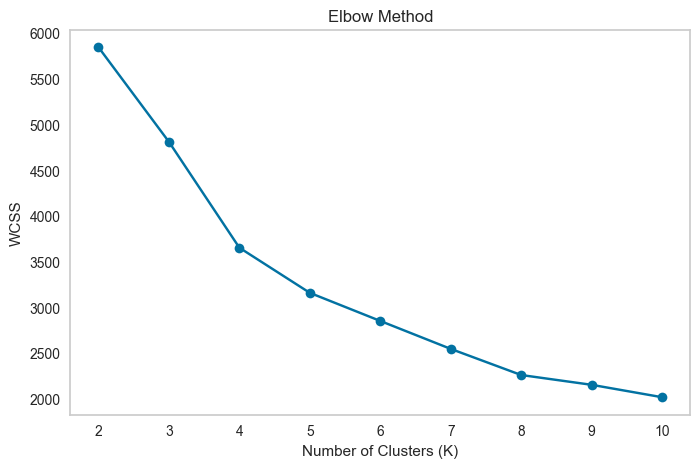

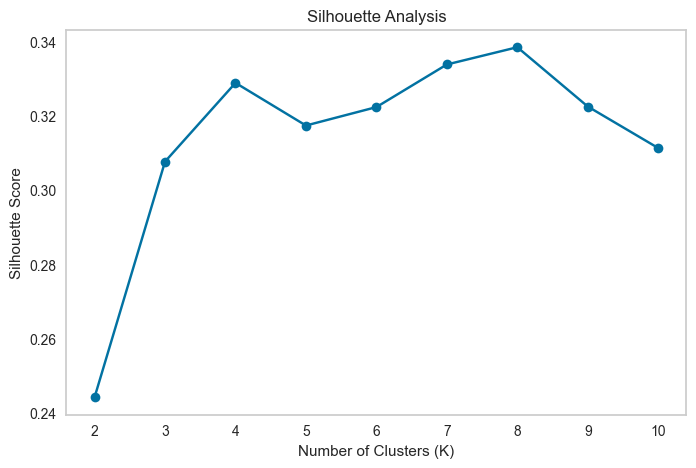

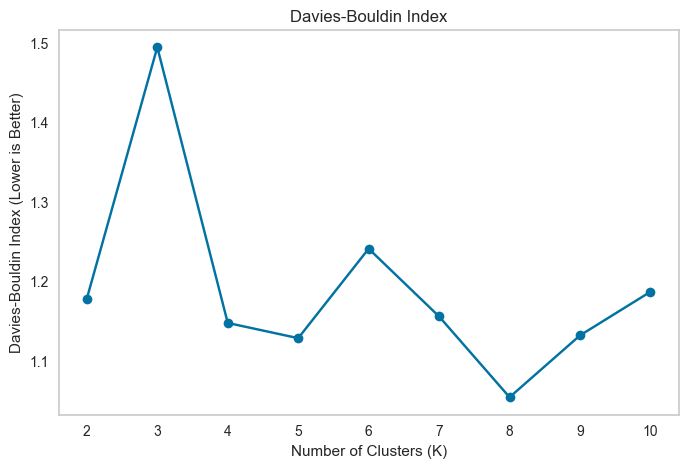

In [54]:
# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 클러스터 개수 범위 설정
k_range = range(2, 11)

# 결과 저장 딕셔너리
results = {
    "K": [],
    "WCSS": [],
    "Silhouette": [],
    "Davies-Bouldin": []
}

# 1. 엘보우 방법: WCSS 계산
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss = kmeans.inertia_  # Within-Cluster Sum of Squares (WCSS)
    results["K"].append(k)
    results["WCSS"].append(wcss)

# 엘보우 그래프
plt.figure(figsize=(8, 5))
plt.plot(results["K"], results["WCSS"], marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.grid()
plt.show()

# 2. 실루엣 분석: Silhouette Score 계산
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    results["Silhouette"].append(silhouette_avg)

# 실루엣 그래프
plt.figure(figsize=(8, 5))
plt.plot(results["K"], results["Silhouette"], marker='o')
plt.title("Silhouette Analysis")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid()
plt.show()

# 3. 데이비스-볼딘 지수: Davies-Bouldin Index 계산
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    db_score = davies_bouldin_score(data_scaled, cluster_labels)
    results["Davies-Bouldin"].append(db_score)

# 데이비스-볼딘 그래프
plt.figure(figsize=(8, 5))
plt.plot(results["K"], results["Davies-Bouldin"], marker='o')
plt.title("Davies-Bouldin Index")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Davies-Bouldin Index (Lower is Better)")
plt.grid()
plt.show()

In [ ]:
# 결과 요약
results_df = pd.DataFrame(results)
print("\nSummary of Cluster Evaluation Metrics:")
print(results_df)

# 7. 예측

In [20]:
import pandas as pd
from tqdm import tqdm
from datasets import load_dataset

ds = load_dataset("searle-j/kote", trust_remote_code=True)
print(ds)

DatasetDict({
    train: Dataset({
        features: ['ID', 'text', 'labels'],
        num_rows: 40000
    })
    test: Dataset({
        features: ['ID', 'text', 'labels'],
        num_rows: 5000
    })
    validation: Dataset({
        features: ['ID', 'text', 'labels'],
        num_rows: 5000
    })
})


In [21]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline

# PyTorch에서 GPU 설정 확인
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

# Hugging Face에서 토크나이저와 모델 불러오기
tokenizer = AutoTokenizer.from_pretrained("searle-j/kote_for_easygoing_people", trust_remote_code=True)
model = AutoModelForSequenceClassification.from_pretrained("searle-j/kote_for_easygoing_people")

# 감정 분석 모델 설정 
pipe = TextClassificationPipeline(
    model=model.to(device),  # 모델을 GPU로 이동
    tokenizer=tokenizer,
    device=0 if device == "cuda" else -1,  # GPU(0) 또는 CPU(-1)
    return_all_scores=True,
    function_to_apply='sigmoid'
)

Using device: cpu


Device set to use cpu


In [22]:
def perform_sentiment_analysis(text_list):
    """
    감정 분석을 수행하여 각 텍스트에 대한 가장 높은 점수의 레이블을 반환합니다.

    Parameters:
        text_list (list): 텍스트 데이터 리스트

    Returns:
        list: 각 텍스트에 대한 감정 분석 결과 레이블
    """
    emotions = []
    for text in tqdm(text_list, desc="Performing Sentiment Analysis", unit="comment"):
        pipe_text = pipe([text])  # pipe는 개별적으로 호출
        highest_label = max(pipe_text[0], key=lambda x: x["score"])["label"]
        emotions.append(highest_label)
    return emotions


def save_with_emotions(df, text_column, output_file):
    """
    데이터프레임에서 댓글 열을 분석하고 감정 결과를 추가한 후 저장합니다.

    Parameters:
        df (pd.DataFrame): 감정 분석을 수행할 데이터프레임
        text_column (str): 댓글이 있는 열 이름
        output_file (str): 저장할 파일 이름
    """
    text_list = df[text_column].tolist()
    print(f"Processing {output_file}...")
    
    # 감정 분석 수행
    df["emotion"] = perform_sentiment_analysis(text_list)
    
    # 결과 저장
    df.to_csv(output_file, index=False, encoding="utf-8-sig")
    print(f"{output_file} 저장 완료!")

In [23]:
import joblib

# 모델 로드
loaded_model = joblib.load("best_xgb_model.pkl")

# # 로드된 모델로 예측 수행
# y_pred = loaded_model.predict(X_test)

In [28]:
predict_webtoon = [
    '가나다라마바사',
    '바나나 사과 애플',
    '연재중 웹툰 최종.csv',
    '분명 예뻣을 꽃',
    '우정, 아니면 배신',
    '실시간 인기 도전만화',
    '공유하기',
    '주인공 유소희는 오랜친궇였던 김지유로 인해 옥상에서 떨어져 죽고 만다.',
    '그러나 이게 어떻게 된 일?!',
    '유소희는 타임루프로 과거로 돌아각 ㅔ된다.',
    '즉, 자시닝 살을 수 있을때까지 시간에 갇힌다는 것',
    '과연 유소희는 친구 김지유와 친해져 찾아날 수 있을까?',
    '한치 앞을 알 수 없는 지옥속에서 꿈을 꾸었던 소녀 유사와 소년 하스의 이야기',
    '예측할 웹툰 댓글 감정 분석',
    '봉주르'
]

In [29]:
perform_sentiment_analysis(predict_webtoon)

Performing Sentiment Analysis: 100%|██████████| 15/15 [00:00<00:00, 17.43comment/s]


['없음',
 '없음',
 '기대감',
 '신기함/관심',
 '없음',
 '기대감',
 '기대감',
 '안타까움/실망',
 '놀람',
 '기대감',
 '안타까움/실망',
 '기대감',
 '슬픔',
 '없음',
 '즐거움/신남']

In [37]:
predict_webtoon = {
    'rating' : 4.60,
    'genre' : '판타지',
    'interest' : 1,
    'episode_count' : 12,
    'originality' : 0,
    'work_count' : 0,
    'previous_work' : 0,
    'likes' : 0,
    'rating_participants' : 9,
    'comments_count' : 3,
    'Comments' : [['지금 읽었네요 죄송합니다ㅠㅠ투표로 결정해 다시 연재할지 고민 중입니다', '왜끝나용?..', '안녕하세요 쿠아입니다^^댓글으루달아주시면 올해로 5학년이 되는 저에게 큰 도움이 됩니다! ㅎㅎ많이 봐주셨으면 좋겠습니다! 감사합니다 ㅎㅎ']]
}
predict_dict = pd.DataFrame(predict_webtoon)
predict_dict

,rating,genre,interest,episode_count,originality,work_count,previous_work,likes,rating_participants,comments_count,Comments
0,4.6,판타지,1,12,0,0,0,0,9,3,"[지금 읽었네요 죄송합니다ㅠㅠ투표로 결정해 다시 연재할지 고민 중입니다, 왜끝나용?..."


In [38]:
# 예측할 웹툰 댓글 감정 분석
save_with_emotions(predict_dict, text_column="Comments", output_file="test_predict.csv")

Processing test_predict.csv...


Performing Sentiment Analysis:   0%|          | 0/1 [00:00<?, ?comment/s]


ValueError: The pipeline received invalid inputs, if you are trying to send text pairs, you can try to send a dictionary `{"text": "My text", "text_pair": "My pair"}` in order to send a text pair.

In [36]:
test = pd.read_csv('test_predict.csv')
test

,rating,genre,interest,episode_count,originality,work_count,previous_work,likes,rating_participants,comments_count,Comments,emotion
0,4.6,판타지,1,12,0,0,0,0,9,3,지금 읽었네요 죄송합니다ㅠㅠ투표로 결정해 다시 연재할지 고민 중입니다,안타까움/실망
1,4.6,판타지,1,12,0,0,0,0,9,3,왜끝나용?..,당황/난처
2,4.6,판타지,1,12,0,0,0,0,9,3,안녕하세요 쿠아입니다^^댓글으루달아주시면 올해로 5학년이 되는 저에게 큰 도움이 됩...,기대감


In [39]:
temp = pd.read_csv('temp.csv')
temp

,rating,episode_count,originality,work_count,previous_work,likes,rating_participants,comments_count,감동/감탄,경악,...,genre_감성,genre_개그,genre_드라마,genre_로맨스,genre_무협/사극,genre_스릴러,genre_스포츠,genre_액션,genre_일상,genre_판타지
0,0.941653,0.376167,False,0.021277,False,0.203096,0.376211,0.429757,0.217391,0.00,...,False,False,False,False,False,False,False,False,False,True
1,0.944895,0.396267,False,0.010638,True,0.300439,0.372155,0.294944,0.065217,0.00,...,False,False,False,False,False,False,False,False,False,True
2,0.991896,0.352477,False,0.106383,True,0.802448,0.300595,0.168407,0.195652,0.15,...,False,False,False,True,False,False,False,False,False,False
3,0.896272,0.172290,False,0.031915,False,0.842097,0.510231,0.215133,0.130435,0.00,...,False,False,False,True,False,False,False,False,False,False
4,0.949757,0.145011,False,0.127660,True,0.597130,0.280594,0.090449,0.391304,0.00,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202,0.990276,0.025844,False,0.000000,False,0.004672,0.001154,0.000388,0.210379,0.00,...,False,False,False,True,False,False,False,False,False,False
1203,0.985413,0.049533,True,0.031915,True,0.043284,0.021199,0.005505,0.212665,0.00,...,False,False,False,True,False,False,False,False,False,False
1204,0.977310,0.053841,True,0.000000,True,0.057642,0.026447,0.005600,0.320264,0.00,...,False,False,False,True,False,False,False,False,False,False
1205,0.977310,0.032304,False,0.021277,True,0.015583,0.009064,0.002477,0.642292,0.00,...,False,False,False,False,False,False,False,False,False,True
